<a href="https://colab.research.google.com/github/snehaangeline/Lora/blob/main/lora_predicting2parameter_spread.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas==1.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.5 MB 7.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_excel("/content/sample_data/lorawan dataset.xls")
df

,DEVICE ID,RSSI,SNR,FREQ,SPREADING FACTOR,BW,AIR TIME,DISTANCE FROM GATEWAY,TIME STAMP
0,1,-113,-3.8,868500000,11,125,00:00:00,1 KM,00:41:46
1,1,-114,-4.3,868100000,11,125,00:00:08,1 KM,00:43:17
2,1,-113,-3.0,868100000,7,125,00:00:13,1 KM,01:15:31
3,1,-113,-7.0,868500000,12,125,00:00:08,2 KM,01:37:45
4,1,-114,-10.8,868300000,11,125,00:00:08,3.5 KM,03:58:40
...,...,...,...,...,...,...,...,...,...
617,50,-114,-8.3,868100000,8,125,00:01:12,3 KM,03:12:27
618,50,-113,-2.5,868100000,12,125,00:01:00,3.5 KM,03:52:44
619,50,-115,-11.3,868100000,11,125,00:01:47,4 KM,05:24:37
620,50,-115,-11.5,868100000,10,125,00:01:00,4 KM,05:30:31


**data preproceesing**

In [ ]:
df.isnull().sum()

DEVICE ID                0
RSSI                     0
SNR                      0
FREQ                     0
SPREADING FACTOR         0
BW                       0
AIR TIME                 0
DISTANCE FROM GATEWAY    0
TIME STAMP               0
dtype: int64

In [ ]:
df = df.rename(columns={"SPREADING FACTOR":"SPREAD","DEVICE ID":"ID",'AIR TIME ':"TIME","DISTANCE FROM GATEWAY":"DGATEWAY"})

In [ ]:
df.drop((['ID',"DGATEWAY","TIME","BW"]), axis=1, inplace=True)

In [ ]:
df.drop((["TIME STAMP"]), axis=1, inplace=True)

In [ ]:
df.columns

Index(['RSSI', 'SNR', 'FREQ', 'SPREAD'], dtype='object')

In [ ]:
df.drop((['FREQ']), axis=1, inplace=True)

**visualisation only selected features** ---RSSI,SNR,SPREAD

In [ ]:
import seaborn as sb

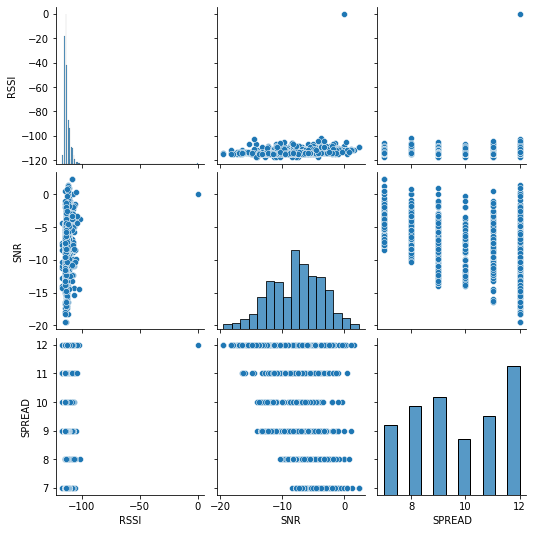

In [ ]:
sb.pairplot(df)

In [ ]:
df.corr()

,RSSI,SNR,SPREAD
RSSI,1.000000,0.188616,0.029734
SNR,0.188616,1.000000,-0.433228
SPREAD,0.029734,-0.433228,1.000000


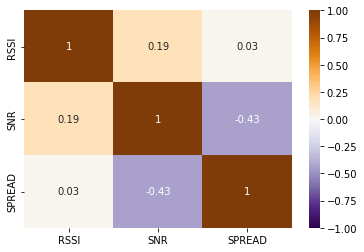

In [ ]:
sns.heatmap(df.corr(), annot=True,vmin=-1,vmax=1,center=0,cmap='PuOr_r')

**import model**

In [ ]:
X = pd.DataFrame(np.c_[df['RSSI'],df['SNR']], columns = ['SNR','RSSI']).to_numpy()
X

array([[-113. ,   -3.8],
       [-114. ,   -4.3],
       [-113. ,   -3. ],
       ...,
       [-115. ,  -11.3],
       [-115. ,  -11.5],
       [-115. ,  -13.3]])

In [ ]:
Y = df['SPREAD'].to_numpy()
Y

array([11, 11,  7, 12, 11, 10,  9,  7, 12, 11, 10, 10, 12,  8, 12, 10, 12,
       11,  7,  7,  7,  7, 12, 11, 12,  8,  8, 12,  9,  8,  7, 12,  7, 12,
       12,  9,  8, 11, 12,  9,  9,  7,  8,  9,  8, 11, 10,  9, 10, 11,  9,
        9,  7,  8, 10, 10,  9, 12, 11, 11,  9,  7,  7, 12, 11, 12,  8,  7,
       12, 10,  8,  7, 12,  9,  8, 12, 11,  8,  8,  8, 12,  8, 11, 10,  8,
        8,  8,  7, 12, 11, 11, 10,  9,  7,  8, 12, 11, 10,  9,  9,  9, 11,
       10,  9,  7, 11,  9, 12, 11,  9, 12, 12,  9,  9,  8,  8,  7, 12, 12,
       10, 12, 12,  9, 10, 12,  9,  7, 12, 10,  7,  7, 10,  8,  8, 12, 12,
       12, 10, 12,  9,  8,  9,  8, 10, 12, 12, 11, 11,  8,  7, 12, 12, 12,
        7,  9, 12, 12,  8,  7, 12, 12,  9,  8,  9,  9,  7, 12,  8, 12,  9,
        9, 11, 11,  9,  7, 12, 12, 10,  7,  7,  7, 12, 10,  9,  8, 12, 12,
        9,  9,  9, 11,  9, 10, 12, 10,  9, 12,  9,  8,  7,  7, 12, 11,  8,
        8, 10,  8,  9,  7,  8, 10,  8, 10,  9, 12, 12, 11, 11,  9, 12, 12,
        8, 12,  7,  9, 12

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,Y)

LinearRegression()

In [ ]:
lr.score(X,Y)

0.20056492496222267

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
lr.predict([[-113.,-3.8]])

array([8.94218571])

**predicting new feature**

In [ ]:
new_spreadfactor=np.array([[-115,-8]])
lr.predict(new_spreadfactor)

array([9.66118288])

polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
pr=PolynomialFeatures(degree=4)
pr

PolynomialFeatures(degree=4)

In [ ]:
X_pr=pr.fit_transform(X)

In [ ]:
X.shape

(622, 2)

In [ ]:
X_pr.shape

(622, 15)

In [ ]:
lr_p = LinearRegression()
lr_p.fit(X_pr,Y)
lr_p.score(X_pr, Y)

0.2543950719247656

In [ ]:
y_pred = lr_p.predict(X_pr)

In [ ]:
lr_p.predict(pr.fit_transform([[-113.,-3.8]]))

array([8.58292818])

**predicting new feature**

In [ ]:
new_spreadfactor=np.array([[-115,-8]])
lr_p.predict(pr.fit_transform(new_spreadfactor))

array([9.50249388])